In [1]:
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt, mpld3
import seaborn; seaborn.set()
%matplotlib inline

In [2]:
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.display()

In [3]:
# looking into crash days and time

In [33]:
df = pd.read_csv(r'../../Machine Learning/Data Incubator/Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\Lenovo\Anaconda3\envs\cs231n\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [35]:
df = df[(df['CRASH DATE'] >= '2017-01-01') & (df['CRASH DATE'] < '2019-12-31')].reset_index(drop=True)

In [36]:
df = df.set_index('CRASH DATE')

In [37]:
df.sort_index(ascending=False)

,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
CRASH DATE,,,,,,,,,,,,,,,,,,,,,
2019-12-30,19:00,QUEENS,11421,40.695460,-73.852710,POINT (-73.85271 40.69546),WOODHAVEN BOULEVARD,86 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4267129,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2019-12-30,18:38,MANHATTAN,10023,40.771393,-73.982160,POINT (-73.98216 40.771393),BROADWAY,WEST 63 STREET,NaN,0.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4267381,Sedan,Sedan,NaN,NaN,NaN
2019-12-30,8:15,QUEENS,11004,40.752037,-73.721100,POINT (-73.7211 40.752037),LITTLE NECK PARKWAY,252 STREET,NaN,1.0,...,Unspecified,NaN,NaN,NaN,4267299,Sedan,Sedan,NaN,NaN,NaN
2019-12-30,9:30,QUEENS,11102,NaN,NaN,NaN,NaN,NaN,2542 crescent street,0.0,...,NaN,NaN,NaN,NaN,4266762,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2019-12-30,18:00,QUEENS,11415,40.706142,-73.831770,POINT (-73.83177 40.706142),LEFFERTS BOULEVARD,METROPOLITAN AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4267059,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01,19:20,NaN,NaN,40.755390,-73.828285,POINT (-73.828285 40.75539),MAPLE AVENUE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3590362,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2017-01-01,17:20,MANHATTAN,10018,40.758976,-73.993940,POINT (-73.99394 40.758976),WEST 42 STREET,DYER AVENUE,NaN,4.0,...,Unspecified,Unspecified,Unspecified,NaN,3591876,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN
2017-01-01,1:43,NaN,NaN,40.770770,-73.917270,POINT (-73.91727 40.77077),31 STREET,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3590003,Sedan,Sedan,NaN,NaN,NaN


In [38]:
df1 = df.groupby('CRASH DATE').count()

In [39]:
df1

,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
CRASH DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,485,313,313,462,462,462,383,250,101,485,...,375,44,13,5,485,478,343,41,13,5
2017-01-02,449,275,275,434,434,434,367,226,82,449,...,356,28,5,3,449,437,328,25,4,2
2017-01-03,659,394,394,622,622,622,541,340,116,659,...,522,40,6,0,659,647,491,36,6,0
2017-01-04,590,376,376,554,554,554,450,290,139,590,...,489,43,8,1,590,586,462,42,8,1
2017-01-05,552,357,357,522,522,522,431,281,120,552,...,491,35,10,2,552,549,454,32,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,414,254,254,378,378,378,331,206,83,414,...,334,22,4,2,414,406,312,22,4,1
2019-12-27,448,309,309,412,412,412,322,219,126,448,...,366,33,7,1,448,441,342,30,6,1
2019-12-28,355,235,235,322,322,322,277,190,78,355,...,298,30,4,1,355,350,279,29,4,1


In [40]:
df1['CRASH TIME']

CRASH DATE
2017-01-01    485
2017-01-02    449
2017-01-03    659
2017-01-04    590
2017-01-05    552
             ... 
2019-12-26    414
2019-12-27    448
2019-12-28    355
2019-12-29    384
2019-12-30    517
Name: CRASH TIME, Length: 1094, dtype: int64

In [41]:
df1['CRASH TIME'].rolling(2).sum()

CRASH DATE
2017-01-01       NaN
2017-01-02     934.0
2017-01-03    1108.0
2017-01-04    1249.0
2017-01-05    1142.0
               ...  
2019-12-26     678.0
2019-12-27     862.0
2019-12-28     803.0
2019-12-29     739.0
2019-12-30     901.0
Name: CRASH TIME, Length: 1094, dtype: float64

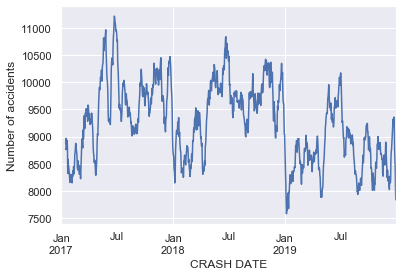

In [42]:
# using a 15 days moving average
df1['CRASH TIME'].rolling(15).sum().plot()
plt.ylabel('Number of accidents');